In [136]:
import numpy as np
from UZ_utils import *
import cv2
from matplotlib import pyplot as plt
import os

# Exercise 1

### a

In [137]:
def myhist3(arr, n):
    min = np.min(arr)
    max = np.max(arr)
    diff = max - min
    shape = arr.shape
    arr = arr.reshape((shape[0] * shape[1], 3)) # reshaping into one dimensional image with 3 channels (2D (w*h)*3)
    arr = ((arr.astype(np.float64) - min) / diff) * (n)
    arr = arr.astype(np.uint8)
    arr[arr == n] = n-1 # max value is n (n goes into n-1 bin)
    counts = np.zeros((n, n, n))
    for pixel in arr:
        counts[pixel[2], pixel[1], pixel[0]] += 1
    
    return counts / len(arr) # normalizing

### b 

In [138]:
def compare_histograms(hist1, hist2, method):
    hist1 = hist1.reshape(-1) # turn histograms in 1D array
    hist2 = hist2.reshape(-1)
    if method == "L2":
        # print("L2")
        return np.sqrt(np.sum((hist1 - hist2) * (hist1 - hist2)))
    elif method == "x^2":
        # print("x^2")
        return 0.5 * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1.0e-10))
    elif method == "I":
        # print("I")
        return 1 - np.sum(np.minimum(hist1, hist2))
    elif method == "H":
        # print("H")
        return np.sqrt(0.5 * np.sum((np.sqrt(hist1) - np.sqrt(hist2)) ** 2))
    else:
        print("Method not implemented")

### c

In [139]:
obj1_1 = cv2.imread('dataset/object_01_1.png') # 0-255
obj1_1 = cv2.cvtColor(obj1_1, cv2.COLOR_BGR2RGB)
obj2_1 = cv2.imread('dataset/object_02_1.png') # 0-255
obj2_1 = cv2.cvtColor(obj2_1, cv2.COLOR_BGR2RGB)
obj3_1 = cv2.imread('dataset/object_03_1.png') # 0-255
obj3_1 = cv2.cvtColor(obj3_1, cv2.COLOR_BGR2RGB)

n_bins = 8
hist1 = myhist3(obj1_1, n_bins)
hist2 = myhist3(obj2_1, n_bins)
hist3 = myhist3(obj3_1, n_bins)
hist1 = hist1.reshape(-1)
hist2 = hist2.reshape(-1)
hist3 = hist3.reshape(-1)

In [140]:
value1 = compare_histograms(hist1, hist1, "L2")
print(value1)
value2 = compare_histograms(hist1, hist2, "L2")
print(value2)
value3 = compare_histograms(hist1, hist3, "L2")
print(value3)
# value = compare_histograms(hist1, hist2, "L2")
# print(value)
# value = compare_histograms(hist1, hist2, "x^2")
# print(value)
# value = compare_histograms(hist1, hist2, "I")
# print(value)
# value = compare_histograms(hist1, hist2, "H")
# print(value)

0.0
0.4262689894140761
0.09658762854854758


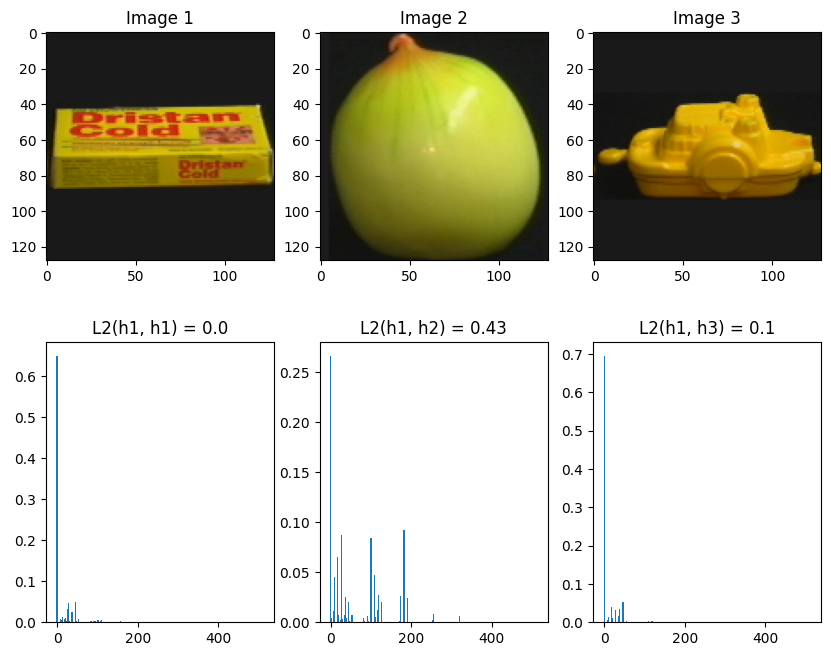

In [141]:
f = plt.figure(figsize=(10, 8))
f.add_subplot(2, 3, 1)
plt.imshow(obj1_1)
plt.title("Image 1")
f.add_subplot(2, 3, 2)
plt.imshow(obj2_1)
plt.title("Image 2")
f.add_subplot(2, 3, 3)
plt.imshow(obj3_1)
plt.title("Image 3")
f.add_subplot(2, 3, 4)
plt.bar(np.arange(n_bins**3), hist1, width=3)
plt.title(f"L2(h1, h1) = {np.round(value1, 2)}")
f.add_subplot(2, 3, 5)
plt.bar(np.arange(n_bins**3), hist2, width=3)
plt.title(f"L2(h1, h2) = {np.round(value2, 2)}")
f.add_subplot(2, 3, 6)
plt.bar(np.arange(n_bins**3), hist3, width=3)
plt.title(f"L2(h1, h3) = {np.round(value3, 2)}")
plt.show()

### d

In [145]:
def calculateHistogramsInFolder(path, n_bins):
    files = os.listdir(path)
    histograms = {}
    for f in files:
        temp = cv2.imread(f'{path}/{f}') # 0-255
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        tempHist = myhist3(temp, n_bins)
        tempHist = tempHist.reshape(-1)
        histograms[f] = tempHist
    return histograms

n_bins = 10
histograms = calculateHistogramsInFolder("dataset", n_bins)

In [146]:

imageToCompare = cv2.imread('dataset/object_05_4.png') # 0-255
imageToCompare = cv2.cvtColor(imageToCompare, cv2.COLOR_BGR2RGB)
imageToCompareHist = myhist3(imageToCompare, n_bins)
imageToCompareHist = imageToCompareHist.reshape(-1)

comparingMathod = "H"

# for i in histograms:
#     value = compare_histograms(imageToCompareHist, histograms[i], "L2")
#     print(value)

sortedHistograms = sorted(histograms.items(), key=lambda a: compare_histograms(imageToCompareHist, a[1], comparingMathod))

# for i in sortedHistograms:
#     value = compare_histograms(imageToCompareHist, i[1], "L2")
#     print(i[0], value)


# value = compare_histograms(imageToCompareHist, histograms['object_22_2.png'], comparingMathod)
# print(value)


object_05_4.png 0.0
object_05_3.png 0.16425273721389383
object_05_2.png 0.18127034693146282
object_05_1.png 0.18626893060451802
object_26_1.png 0.4810284011608195
object_26_3.png 0.48375664977263033


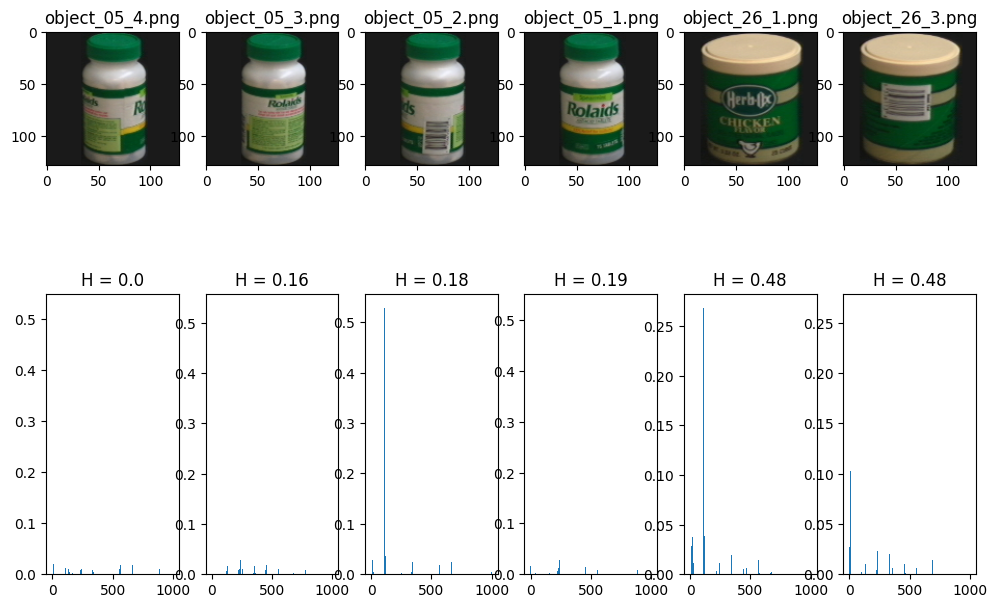

In [147]:
f = plt.figure(figsize=(12, 8))
for i, data in enumerate(sortedHistograms):
    if i == 6:
         break
    value = compare_histograms(imageToCompareHist, data[1], comparingMathod)
    print(data[0], value)
    temp = cv2.imread(f'dataset/{data[0]}') # 0-255
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    f.add_subplot(2, 6, 1+i)
    plt.imshow(temp)
    plt.title(data[0])
    f.add_subplot(2, 6, 7+i)
    plt.bar(np.arange(n_bins**3), data[1], width=3)
    plt.title(f"{comparingMathod} = {np.round(value, 2)}")
    
plt.show()
